In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
import pandas as pd
import random
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
import numpy as np
from sklearn.utils.multiclass import unique_labels
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from tensorflow.keras.applications import VGG19 #For Transfer Learning
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,Adam
from keras.models import Model

In [3]:
epochs = 10

In [4]:
x = np.load('/content/drive/MyDrive/Datasets/fold3/images.npy')
y = np.load('/content/drive/MyDrive/Datasets/fold3/types.npy')


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state= 1)

In [6]:
x_train1, x_train2, y_train1, y_train2= train_test_split(x_train,y_train, test_size=.5, random_state=1)

In [7]:
print((x_test.shape, y_test.shape))

print((x_train1.shape, y_train1.shape))
print((x_train2.shape, y_train2.shape))

((681, 256, 256, 3), (681,))
((1020, 256, 256, 3), (1020,))
((1021, 256, 256, 3), (1021,))


In [8]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#encoding y_test

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_test)
print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

y_test = onehot_encoded

In [10]:
## encoding y_train1
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_train1)
print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

y_train1 = onehot_encoded

[ 4  3 17 ...  3  3  7]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
## encoding y_train2
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_train2)
print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

y_train2 = onehot_encoded

[5 5 9 ... 3 1 3]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
print((x_test.shape, y_test.shape))

print((x_train1.shape, y_train1.shape))
print((x_train2.shape, y_train2.shape))

((681, 256, 256, 3), (681, 19))
((1020, 256, 256, 3), (1020, 19))
((1021, 256, 256, 3), (1021, 19))


In [13]:
# y_test = to_categorical(y_test)
# y_train1 = to_categorical(y_train1)
# y_train2 = to_categorical(y_train2)

In [14]:
# print((x_test.shape, y_test.shape))

# print((x_train1.shape, y_train1.shape))
# print((x_train2.shape, y_train2.shape))

((681, 256, 256, 3), (681, 19, 2))
((1020, 256, 256, 3), (1020, 19, 2))
((1021, 256, 256, 3), (1021, 19, 2))


In [13]:
train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1 )

In [14]:
train_generator.fit(x_train1)

In [15]:
test_generator = ImageDataGenerator(rotation_range=2,  horizontal_flip= True, zoom_range=.1)

In [16]:
test_generator.fit(x_test)

In [17]:
#Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01,  patience=3, min_lr=1e-5)

In [18]:
#Initializing ResNet50
from tensorflow.keras.applications import ResNet50
base_model_resnet = ResNet50(include_top = False, weights = 'imagenet', input_shape = (256,256,3), classes = y_train1.shape[1])

94781440/94765736 [==============================] - 1s 0us/step


In [19]:
#Adding layers to the ResNet50
model_resnet=Sequential()
#Add the Dense layers along with activation and batch normalization
model_resnet.add(base_model_resnet)
model_resnet.add(Flatten())
#Add the Dense layers along with activation and batch normalization
model_resnet.add(Dense(1024,activation=('relu'), input_dim=512))
model_resnet.add(Dense(512,activation=('relu'))) 
model_resnet.add(Dropout(.4))
model_resnet.add(Dense(256,activation=('relu'))) 
model_resnet.add(Dropout(.3))
model_resnet.add(Dense(128,activation=('relu')))
model_resnet.add(Dropout(.2))
model_resnet.add(Dense(19,activation=('softmax')))

#Summary of ResNet50 Model
model_resnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 1024)              134218752 
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [20]:
from tensorflow.keras.optimizers import SGD


In [21]:
model_resnet.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [22]:
#Training the ResNet50 model
rest_net_history = model_resnet.fit(x_train1,y_train1, epochs=10,validation_data = (x_test,y_test), verbose=1, callbacks = [lrr])

Epoch 1/10
32/32 [==============================] - 116s 3s/step - loss: 2.3770 - accuracy: 0.3608 - val_loss: 2.6667 - val_accuracy: 0.1982 - lr: 0.0100
Epoch 2/10
32/32 [==============================] - 110s 3s/step - loss: 1.7561 - accuracy: 0.4922 - val_loss: 2.6337 - val_accuracy: 0.2159 - lr: 0.0100
Epoch 3/10
32/32 [==============================] - 109s 3s/step - loss: 1.4368 - accuracy: 0.5784 - val_loss: 2.8261 - val_accuracy: 0.2658 - lr: 0.0100
Epoch 4/10
32/32 [==============================] - 115s 4s/step - loss: 1.2959 - accuracy: 0.6255 - val_loss: 2.2769 - val_accuracy: 0.3627 - lr: 0.0100
Epoch 5/10
32/32 [==============================] - 174s 5s/step - loss: 0.9802 - accuracy: 0.7098 - val_loss: 2.0985 - val_accuracy: 0.3774 - lr: 0.0100
Epoch 6/10
32/32 [==============================] - 172s 5s/step - loss: 0.7331 - accuracy: 0.7735 - val_loss: 1.5577 - val_accuracy: 0.5330 - lr: 0.0100
Epoch 7/10
32/32 [==============================] - 173s 5s/step - loss: 0.5

In [23]:
model_resnet.save('resNet50 epoch 10 fold3 x_train1.h5')

In [ ]:
# from numpy import array
# from numpy import argmax
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder

# # integer encode
# label_encoder = LabelEncoder()
# integer_encoded = label_encoder.fit_transform(y_train)
# print(integer_encoded)

# print(y_train)
# # binary encode
# onehot_encoder = OneHotEncoder(sparse=False)
# integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
# onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
# print(onehot_encoded)

# y_train = onehot_encoded

In [ ]:
# # from numpy import array
# # from numpy import argmax
# # from sklearn.preprocessing import LabelEncoder
# # from sklearn.preprocessing import OneHotEncoder

# # integer encode
# label_encoder = LabelEncoder()
# integer_encoded = label_encoder.fit_transform(y_test)
# print(integer_encoded)

# print(y_test)
# # binary encode
# onehot_encoder = OneHotEncoder(sparse=False)
# integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
# onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
# # print(onehot_encoded)

# y_test = onehot_encoded

In [ ]:
# print(x_train.shape, y_train.shape)
# print(x_test.shape, y_test.shape)

In [ ]:
# from keras.callbacks import ReduceLROnPlateau
# lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01, patience=3, min_lr=1e-5)

**VGG19 using for folder 3**

In [24]:
# from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import VGG19

# define cnn model
def define_model():
	# load model
	model = VGG19(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False

	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True, rotation_range=2, zoom_range=.2)
	
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train2, y_train2, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test, y_test),callbacks=[lrr])

	# evaluate model
	_, acc = model.evaluate(x_train2, y_train2, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg19 fold3 15 epoch x_train2.h5')


run_test_harness()

80150528/80134624 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
8/8 [==============================] - 106s 14s/step - loss: 49.9234 - accuracy: 0.1136 - val_loss: 20.0674 - val_accuracy: 0.3128 - lr: 0.0010
Epoch 2/10
8/8 [==============================] - 104s 14s/step - loss: 8.6984 - accuracy: 0.4339 - val_loss: 3.6349 - val_accuracy: 0.2540 - lr: 0.0010
Epoch 3/10
8/8 [==============================] - 98s 13s/step - loss: 2.1450 - accuracy: 0.3761 - val_loss: 2.7688 - val_accuracy: 0.2834 - lr: 0.0010
Epoch 4/10
8/8 [==============================] - 96s 13s/step - loss: 2.0573 - accuracy: 0.3771 - val_loss: 2.9410 - val_accuracy: 0.2893 - lr: 0.0010
Epoch 5/10
8/8 [==============================] - 96s 13s/step - loss: 1.7039 - accuracy: 0.4290 - val_loss: 2.6078 - val_accuracy: 0.3142 - lr: 0.0010
Epoch 6/10
8/8 [==============================] - 95s 13s/step - loss: 1.4222 - accuracy: 0.4995 - val_loss: 2.7702 - val_accuracy: 0.3744 - lr: 0.0010
Epoch 7/10
8/8 [==============================] - 95s 13s/step - loss: 1.2047 - accu

**VGG16 using for folder 3**

In [25]:
# from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import VGG16

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(256, 256, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False

	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(19, activation='softmax')(class1)
	
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.0001, momentum=0.9)
	model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
	#model.summary()
	return model


# run the test harness for evaluating a model
def run_test_harness():
	
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True,zoom_range=.1)
	
	datagen.mean = [123.68, 116.779, 103.939]
	# fit model
	history = model.fit(x_train1, y_train1, epochs=15, verbose=1, validation_data = (x_test, y_test))
	# evaluate model
	_, acc = model.evaluate(x_train1, y_train1, verbose=1)
	print('> %.3f' % (acc * 100.0))
	# save model
	model.save('vgg16 fold3 15 epoch y_train1.h5')


run_test_harness()

58900480/58889256 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/15
32/32 [==============================] - 86s 3s/step - loss: 14.0021 - accuracy: 0.1892 - val_loss: 2.5847 - val_accuracy: 0.1512
Epoch 2/15
32/32 [==============================] - 83s 3s/step - loss: 2.0674 - accuracy: 0.4088 - val_loss: 2.2010 - val_accuracy: 0.4038
Epoch 3/15
32/32 [==============================] - 84s 3s/step - loss: 1.6612 - accuracy: 0.5127 - val_loss: 2.1490 - val_accuracy: 0.4684
Epoch 4/15
32/32 [==============================] - 84s 3s/step - loss: 1.4451 - accuracy: 0.5559 - val_loss: 2.0609 - val_accuracy: 0.4787
Epoch 5/15
32/32 [==============================] - 83s 3s/step - loss: 1.3120 - accuracy: 0.5804 - val_loss: 2.3543 - val_accuracy: 0.4391
Epoch 6/15
32/32 [==============================] - 83s 3s/step - loss: 1.2345 - accuracy: 0.6020 - val_loss: 2.3154 - val_accuracy: 0.4831
Epoch 7/15
32/32 [==============================] - 83s 3s/step - loss: 1.1256 - accuracy: 0.6402 - val_loss: 2.2917 - val_accuracy: 0.4949
Epoch 8/15
32/32 [=

**Sequential model1 using for folder3**

In [53]:
#Model 1

#Defining the Convolutional Neural Network
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), input_shape = (256,256,3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(19, activation = 'softmax'))


#If your targets are one-hot encoded, use categorical_crossentropy. Examples of one-hot encodings:
# If your targets are integers, use sparse_categorical_crossentropy. 

#model1.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['acc'])
model1.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
#model1.summary()

#Training the CNN model1
#history = model1.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
history1 = model1.fit(x_train1, y_train1, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test, y_test))

model1.save('model 1 fold3 epoch 10.hdf5')

Epoch 1/10
8/8 [==============================] - 36s 5s/step - loss: 1593.1251 - acc: 0.0980 - val_loss: 2.9477 - val_acc: 0.0514
Epoch 2/10
8/8 [==============================] - 33s 4s/step - loss: 3.0591 - acc: 0.0461 - val_loss: 2.9413 - val_acc: 0.0514
Epoch 3/10
8/8 [==============================] - 33s 4s/step - loss: 2.9326 - acc: 0.1382 - val_loss: 2.9323 - val_acc: 0.2878
Epoch 4/10
8/8 [==============================] - 33s 4s/step - loss: 2.7922 - acc: 0.1725 - val_loss: 2.9206 - val_acc: 0.2878
Epoch 5/10
8/8 [==============================] - 33s 4s/step - loss: 2.8875 - acc: 0.2549 - val_loss: 2.9092 - val_acc: 0.2878
Epoch 6/10
8/8 [==============================] - 32s 4s/step - loss: 2.8002 - acc: 0.1961 - val_loss: 2.8971 - val_acc: 0.2863
Epoch 7/10
8/8 [==============================] - 32s 4s/step - loss: 2.8268 - acc: 0.2343 - val_loss: 2.8807 - val_acc: 0.2717
Epoch 8/10
8/8 [==============================] - 32s 4s/step - loss: 2.6844 - acc: 0.2196 - val_loss

**Sequential model2 using for folder 3**

In [55]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape = (256,256,3), activation='relu'))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(Conv2D(25, (1,1)))

model2.add(Flatten())

model2.add(Dense(19, activation = 'softmax'))

model2.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
#model2.summary()

history2 = model2.fit(x_train1, y_train1, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test, y_test))

model2.save('model2 fold3 epoch 10.hdf5')

Epoch 1/10
8/8 [==============================] - 128s 16s/step - loss: 81.1312 - acc: 0.1029 - val_loss: 10.1580 - val_acc: 0.1410
Epoch 2/10
8/8 [==============================] - 125s 16s/step - loss: 8.7786 - acc: 0.1745 - val_loss: 4.1288 - val_acc: 0.2819
Epoch 3/10
8/8 [==============================] - 127s 16s/step - loss: 3.2149 - acc: 0.2382 - val_loss: 2.5661 - val_acc: 0.3025
Epoch 4/10
8/8 [==============================] - 125s 16s/step - loss: 2.4535 - acc: 0.3020 - val_loss: 2.4110 - val_acc: 0.2922
Epoch 5/10
8/8 [==============================] - 124s 16s/step - loss: 2.2824 - acc: 0.3196 - val_loss: 2.2187 - val_acc: 0.3157
Epoch 6/10
8/8 [==============================] - 124s 16s/step - loss: 2.1571 - acc: 0.3510 - val_loss: 2.1329 - val_acc: 0.3392
Epoch 7/10
8/8 [==============================] - 124s 16s/step - loss: 2.0883 - acc: 0.3873 - val_loss: 2.0888 - val_acc: 0.3715
Epoch 8/10
8/8 [==============================] - 124s 16s/step - loss: 2.0605 - acc: 0.

**Sequential Model3 for fold 3**

In [56]:
#Model 3
#
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), input_shape = (256,256,3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(19, activation = 'softmax'))

#If your targets are one-hot encoded, use categorical_crossentropy. Examples of one-hot encodings:
# If your targets are integers, use sparse_categorical_crossentropy. 

#model1.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['acc'])
model3.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
#model3.summary()

#Training the CNN model1
#history = model1.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
history3 = model3.fit(x_train2, y_train2, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test, y_test))

model3.save('model3 fold3 epoch 10.hdf5')


Epoch 1/10
8/8 [==============================] - 26s 3s/step - loss: 4382.0630 - acc: 0.0735 - val_loss: 730.0456 - val_acc: 0.0162
Epoch 2/10
8/8 [==============================] - 24s 3s/step - loss: 630.8903 - acc: 0.1097 - val_loss: 2.9461 - val_acc: 0.0294
Epoch 3/10
8/8 [==============================] - 24s 3s/step - loss: 15.6997 - acc: 0.0862 - val_loss: 2.9425 - val_acc: 0.2805
Epoch 4/10
8/8 [==============================] - 24s 3s/step - loss: 2.5651 - acc: 0.2419 - val_loss: 2.9398 - val_acc: 0.2863
Epoch 5/10
8/8 [==============================] - 24s 3s/step - loss: 2.5483 - acc: 0.2547 - val_loss: 2.9361 - val_acc: 0.2746
Epoch 6/10
8/8 [==============================] - 24s 3s/step - loss: 2.4240 - acc: 0.2840 - val_loss: 2.9357 - val_acc: 0.2658
Epoch 7/10
8/8 [==============================] - 24s 3s/step - loss: 2.1315 - acc: 0.3595 - val_loss: 2.9399 - val_acc: 0.2496
Epoch 8/10
8/8 [==============================] - 24s 3s/step - loss: 1.7662 - acc: 0.4496 - val

**Ensembling all the three models (VGG16, Vgg19, RestNet50)**


In [26]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

In [27]:
model1 = load_model('resNet50 epoch 10 fold3 x_train1.h5')
model2 = load_model('vgg19 fold3 15 epoch x_train2.h5')
model3 = load_model('vgg16 fold3 15 epoch y_train1.h5')


In [28]:
models = [model1, model2, model3] 


In [29]:
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)



In [30]:
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = model1.predict(x_test)
prediction2 = model2.predict(x_test)
prediction3 = model3.predict(x_test)


In [31]:
accuracy1 = accuracy_score(np.argmax(y_test, axis=1), np.argmax(prediction1, axis=1))
accuracy2 = accuracy_score(np.argmax(y_test, axis=1), np.argmax(prediction2, axis=1))
accuracy3 = accuracy_score(np.argmax(y_test, axis=1), np.argmax(prediction3, axis=1))


ensemble_accuracy = accuracy_score(np.argmax(y_test, axis=1), ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)

print('Accuracy Score for average ensemble = ', ensemble_accuracy)

Accuracy Score for model1 =  0.5888399412628488
Accuracy Score for model2 =  0.48604992657856094
Accuracy Score for model3 =  0.48164464023494863
Accuracy Score for average ensemble =  0.593245227606461


In [32]:
#Weighted average ensemble
models = [model1, model2,model3] 
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
weights = [.5, .25,.25] #########this should be filled  

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis= 1), weighted_ensemble_prediction)

In [33]:
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)

print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

Accuracy Score for model1 =  0.5888399412628488
Accuracy Score for model2 =  0.48604992657856094
Accuracy Score for model3 =  0.48164464023494863
Accuracy Score for average ensemble =  0.593245227606461
Accuracy Score for weighted average ensemble =  0.604992657856094


In [35]:
### Explore metrics for the ideal weighted ensemble model. 
import matplotlib.pyplot as plt

models = [model1, model2,model3] 
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
ideal_weights = [.5, .25,.25] 

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(np.argmax(y_test, axis= 1), ideal_weighted_ensemble_prediction)


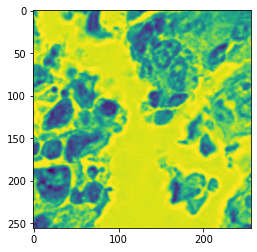

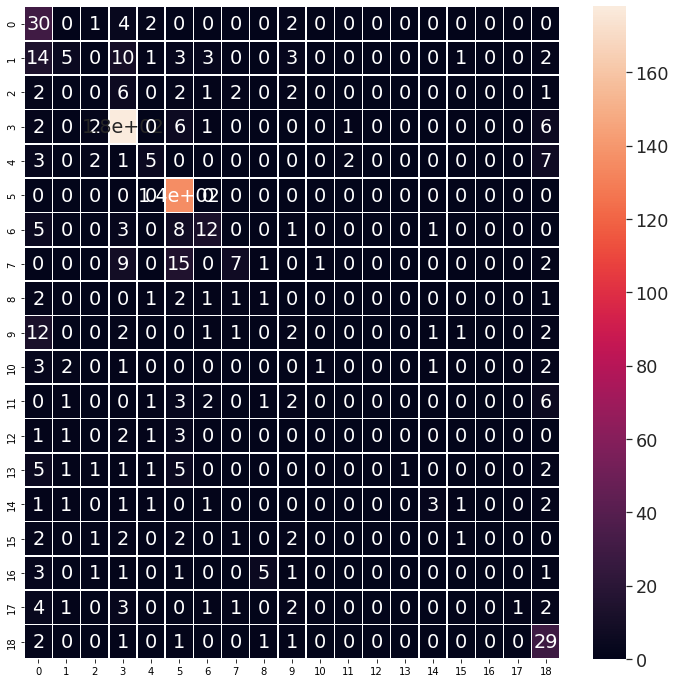

In [36]:
i = random.randint(1,len(ideal_weighted_ensemble_prediction))
plt.imshow(x_test[i,:,:,0]) 
# print("Predicted Label: ", class_names[int(ideal_weighted_ensemble_prediction[i])])
# print("True Label: ", class_names[int(y_test[i])])

from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis= 1), ideal_weighted_ensemble_prediction)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)



**Ensembling model 1 and model 2**

In [37]:
model12 = [model1, model2]


In [38]:
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)



In [39]:
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = model1.predict(x_test)
prediction2 = model2.predict(x_test)


In [40]:
accuracy1 = accuracy_score(np.argmax(y_test, axis=1), np.argmax(prediction1, axis=1))
accuracy2 = accuracy_score(np.argmax(y_test, axis=1), np.argmax(prediction2, axis=1))
ensemble_accuracy = accuracy_score(np.argmax(y_test, axis=1), ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

Accuracy Score for model1 =  0.5888399412628488
Accuracy Score for model2 =  0.48604992657856094
Accuracy Score for average ensemble =  0.593245227606461


In [41]:
#Weighted average ensemble
models = [model1, model2] 
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
weights = [.7,.3] #########this should be filled  

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis= 1), weighted_ensemble_prediction)

In [42]:
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)


print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

Accuracy Score for model1 =  0.5888399412628488
Accuracy Score for model2 =  0.48604992657856094
Accuracy Score for average ensemble =  0.593245227606461
Accuracy Score for weighted average ensemble =  0.5991189427312775


In [43]:
### Explore metrics for the ideal weighted ensemble model. 
import matplotlib.pyplot as plt

models = [model1, model2] 
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
ideal_weights = [.7,.3] 

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(np.argmax(y_test, axis= 1), ideal_weighted_ensemble_prediction)


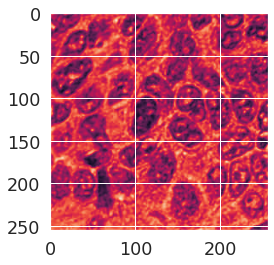

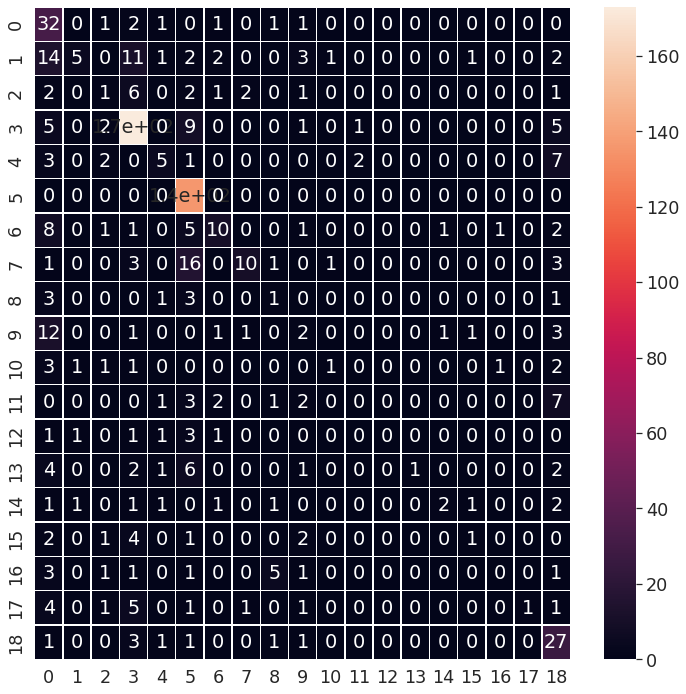

In [44]:
i = random.randint(1,len(ideal_weighted_ensemble_prediction))
plt.imshow(x_test[i,:,:,0]) 
# print("Predicted Label: ", class_names[int(ideal_weighted_ensemble_prediction[i])])
# print("True Label: ", class_names[int(y_test[i])])

from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis= 1), ideal_weighted_ensemble_prediction)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)



**Ensembling model 2 and model 3**

In [45]:
model23 = [model2, model3]

In [46]:
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

In [47]:
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = model1.predict(x_test)
prediction2 = model2.predict(x_test)


In [48]:
accuracy1 = accuracy_score(np.argmax(y_test, axis=1), np.argmax(prediction1, axis=1))
accuracy2 = accuracy_score(np.argmax(y_test, axis=1), np.argmax(prediction2, axis=1))
ensemble_accuracy = accuracy_score(np.argmax(y_test, axis=1), ensemble_prediction)

print('Accuracy Score for model2 = ', accuracy1)
print('Accuracy Score for model3 = ', accuracy2)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

Accuracy Score for model2 =  0.5888399412628488
Accuracy Score for model3 =  0.48604992657856094
Accuracy Score for average ensemble =  0.5903083700440529


In [49]:
#Weighted average ensemble
models = [model2, model3] 
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
weights = [.5,.5] #########this should be filled  

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis= 1), weighted_ensemble_prediction)

In [50]:
print('Accuracy Score for model2 = ', accuracy1)
print('Accuracy Score for model3 = ', accuracy2)


print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

Accuracy Score for model2 =  0.5888399412628488
Accuracy Score for model3 =  0.48604992657856094
Accuracy Score for average ensemble =  0.5903083700440529
Accuracy Score for weighted average ensemble =  0.5154185022026432


In [51]:
### Explore metrics for the ideal weighted ensemble model. 
import matplotlib.pyplot as plt

models = [model1, model2] 
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
ideal_weights = [.5,.5] 

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(np.argmax(y_test, axis= 1), ideal_weighted_ensemble_prediction)


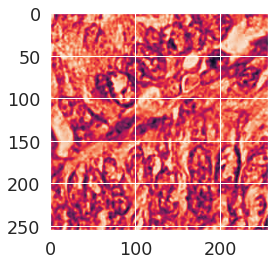

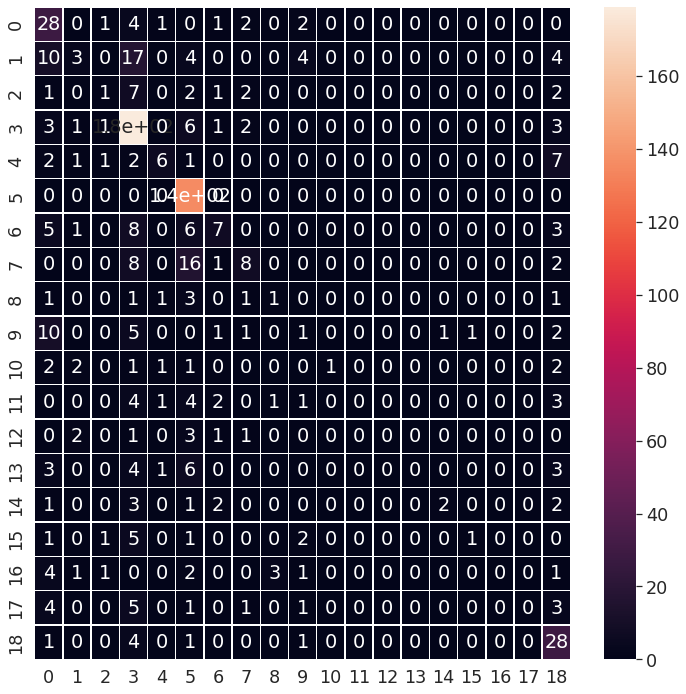

In [52]:
i = random.randint(1,len(ideal_weighted_ensemble_prediction))
plt.imshow(x_test[i,:,:,0]) 
# print("Predicted Label: ", class_names[int(ideal_weighted_ensemble_prediction[i])])
# print("True Label: ", class_names[int(y_test[i])])

from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis= 1), ideal_weighted_ensemble_prediction)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

